In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import Planck13, z_at_value
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm
import subprocess
import os

In [2]:
cosmo = Planck13

In [3]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [4]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [7]:
folder = 'MGS_DR7'
files = [
    'main_gals-DR123a.fit', 
    'main_gals-DR123b.fit',
    'main_gals-DR4.fit',
    'main_gals-DR5.fit',
    'main_gals-DR6.fit',
    'main_gals-DR7.fit'
]

In [8]:
dfs = []
for file in files:
    data = Table.read(folder+'/'+file, format='fits')
    df = data[['ra', 'dec', 'zfinal', 'zconffinal', 'zwarning']].to_pandas()
    dfs.append(df)

In [9]:
full = pd.concat(dfs)

In [10]:
full

,ra,dec,zfinal,zconffinal,zwarning
0,146.714217,-1.041278,0.021265,0.998093,0
1,146.744138,-0.652219,0.203789,0.999300,0
2,146.628573,-0.765148,0.064672,0.998981,0
3,146.631654,-0.988261,0.052667,0.978025,0
4,146.919453,-0.990526,0.213949,0.984952,0
...,...,...,...,...,...
112196,260.743174,31.944035,0.033893,0.999611,0
112197,260.800576,31.898992,0.159699,0.999659,0
112198,260.716009,32.024276,0.167412,0.999942,0
112199,260.697236,32.285628,0.111586,0.999824,0


Text(0, 0.5, 'DEC')

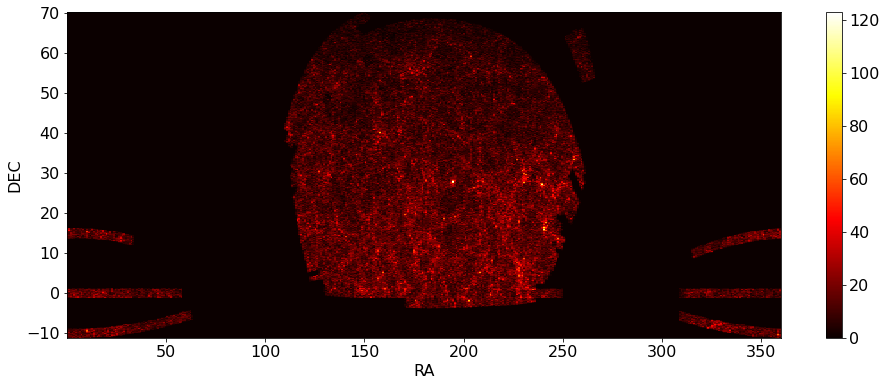

In [23]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(16, 6))

plt.hist2d(full['ra'], full['dec'], 400, cmap=plt.cm.hot)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')

In [21]:
sdss7 = pd.read_csv('SDSS/SDSS_DR7.csv')

In [22]:
sdss7

,ra,dec,z,cx,cy,cz,zErr,zConf,zWarning,type,petroMag_r
0,146.71421,-1.041304,0.021314,-0.835805,0.548725,-0.018173,0.000175,0.998538,0,3.0,14.86596
1,146.91945,-0.990492,0.213991,-0.837779,0.545736,-0.017286,0.000130,0.999355,0,3.0,17.73796
2,146.90229,-0.984913,0.651810,-0.837617,0.545988,-0.017189,0.000931,0.988533,0,6.0,19.58683
3,146.85983,-0.808902,0.126660,-0.837252,0.546635,-0.014118,0.000165,0.999525,0,3.0,17.45244
4,146.76339,-0.810433,0.448533,-0.836331,0.548043,-0.014144,0.000215,0.997568,0,3.0,19.28286
...,...,...,...,...,...,...,...,...,...,...,...
1599445,260.71601,32.024276,0.167412,-0.136778,-0.836718,0.530279,0.000139,0.999942,0,3.0,16.92561
1599446,260.69724,32.285628,0.111586,-0.136659,-0.834277,0.534140,0.000154,0.999824,0,3.0,16.59268
1599447,260.71625,32.092904,0.223961,-0.136672,-0.836091,0.531294,0.000171,0.999148,0,3.0,17.59340
1599448,260.79497,31.936117,2.188700,-0.135755,-0.837710,0.528973,0.001868,0.990211,0,6.0,18.79307


In [ ]:
sdss = data[['ra', 'dec', 'zfinal', 'zconffinal', 'zwarning']].to_pandas()
    dfs.append(df)